I am implementing here a simple 5-layer neural network from scratch. Although created, you might understand that the network is inefficient.

In [12]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
# Default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10.0,8.0)

I am now generating a dataset using the make_moons function.

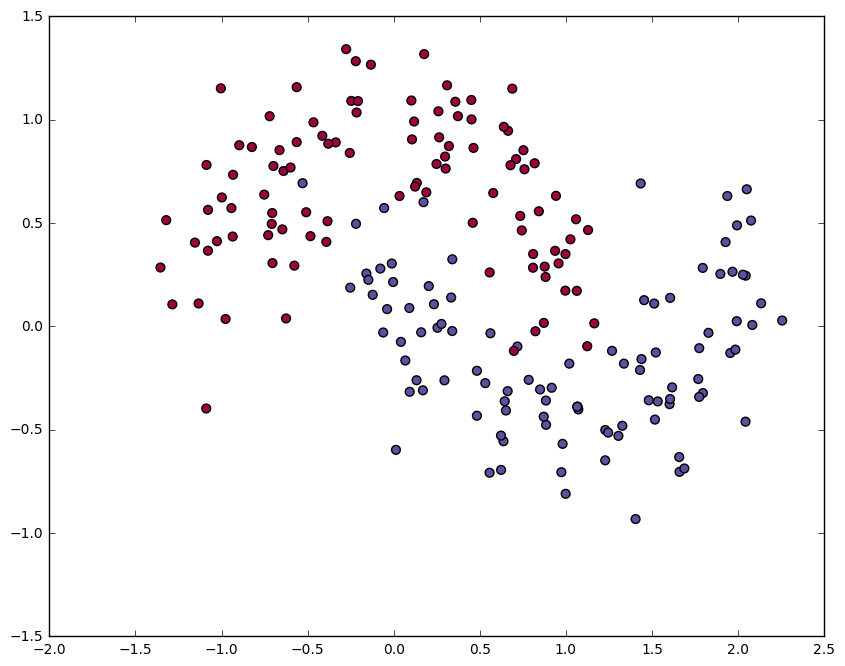

In [13]:
# Generate a dataset and plot it
np.random.seed(0)
X,y=sklearn.datasets.make_moons(200,noise=0.20)
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)

From the above scatter plot, The dataset we generated has two classes, plotted as red and blue points. You can think of the blue dots as male patients and the red dots as female patients, with the x- and y- axis being medical measurements

Our goal is to train a Machine Learning classifier that predicts the correct class (male or female) given the x- and y- coordinates. Note that the data is not linearly separable, we can't draw a straight line that separates the two classes. This means that linear classifiers, such as Logistic Regression, won't be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset.

In [14]:
# Helper function to plot decision boundary
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Let's now build a 3-layer neural network with one input layer, one hidden layer, and one output layer. The number of nodes in the input layer is determined by the dimensionality of our data, 2. Similarly, the number of nodes in the output layer is determined by the number of classes we have, also 2. (Because we only have 2 classes we could actually get away with only one output node predicting 0 or 1, but having 2 makes it easier to extend the network to more classes later on). The input to the network will be x- and y- coordinates and its output will be two probabilities, one for class 0 ("female") and one for class 1 ("male").

We start by defining parameters and variables for gradient descent

In [15]:
# Training set size
num_examples=len(X)

# Setting dimensionalities
nn_input_dim=2
nn_output_dim =2
# Gradient descent parameters
epsilon=0.01
reg_lambda=0.01

In [16]:
# Helper function to evaluate total loss on dataset
def calculate_loss(model):
    W1,b1,W2,b2=model['W1'],model['b1'],model['W2'],model['b2']
    z1=X.dot(W1)+b1
    a1=np.tanh(z1)
    z2=a1.dot(W2)+b2
    exp_scores=np.exp(z2)
    probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    # Calculating loss
    correct_logprobs=-np.log(probs[range(num_examples),y])
    data_loss=np.sum(correct_logprobs)
    # Add regularization term
    data_loss+=reg_lambda/2*(np.sum(np.square(W1))+np.sum(np.square(W2)))
    return 1./num_examples*data_loss

We also implement a helper function to calculate the output of the network. It does forward propagation as defined above and returns the class with the highest probability.


In [17]:
# Helper function to predict output
def predict(model,x):
    W1,b1,W2,b2=model['W1'],model['b1'],model['W2'],model['b2']
    # Forward Propagation
    z1=x.dot(W1)+b1
    a1=np.tanh(z1)
    z2=a1.dot(W2)+b2
    exp_scores=np.exp(z2)
    probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    return np.argmax(probs,axis=1)

In [18]:
# This function learns parameters for the neural network and returns the model
def build_model(nn_hdim,num_passes=20000,print_loss=False):
    np.random.seed(0)
    W1=np.random.randn(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    b1=np.zeros((1,nn_hdim))
    W2=np.random.randn(nn_hdim,nn_output_dim)/np.sqrt(nn_hdim)
    b2=np.zeros((1,nn_output_dim))
    model={}
    for i in range(0,num_passes):
    	# Forward propagation
        z1=X.dot(W1)+b1
        a1=np.tanh(z1)
        z2=a1.dot(W2)+b2
        exp_scores=np.exp(z2)
        probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
        # Backward propagation
        delta3=probs
        delta3[range(num_examples),y]-=1
        dW2=(a1.T).dot(delta3)
        db2=np.sum(delta3,axis=0,keepdims=True)
        delta2=delta3.dot(W2.T)*(1-np.power(a1,2))
        dW1=np.dot(X.T,delta2)
        db1=np.sum(delta2,axis=0)
        # Adding regularization 
        dW2+=reg_lambda*W2
        dW1+=reg_lambda*W1
        # Gradient descent parameter update
        W1+= -epsilon*dW1
        b1+=-epsilon*db1
        W2+=-epsilon*dW2
        b2+=-epsilon*db2
        # Assign new paramters to model
        model={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
        if print_loss and i %1000 ==0:
            print("Loss after iteration %i: %f"%(i,calculate_loss(model)))
        return model

A network with hidden layer of size 5

Loss after iteration 0: 0.613897


D:\Anaconda\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\Anaconda\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


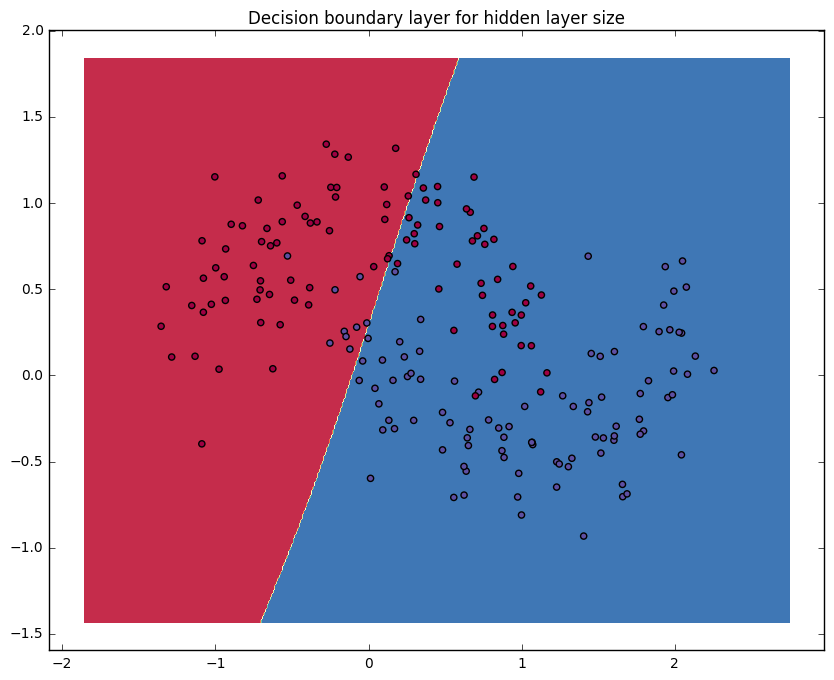

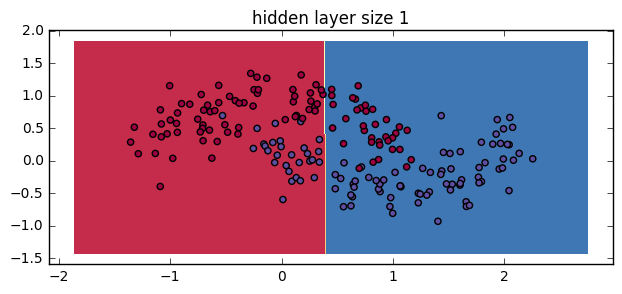

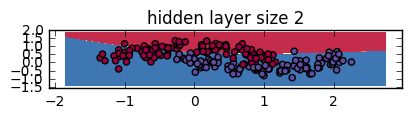

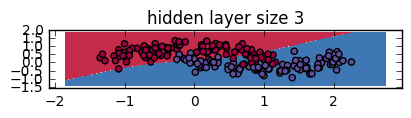

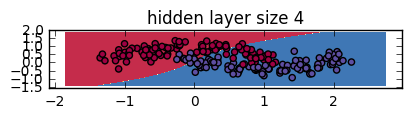

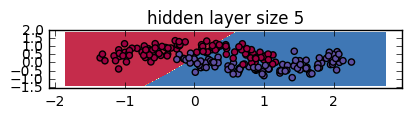

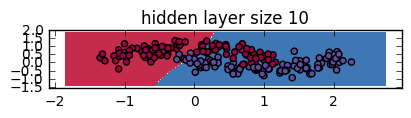

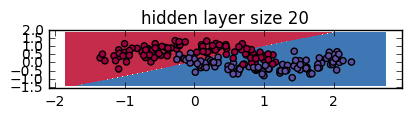

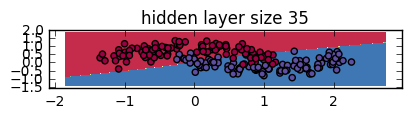

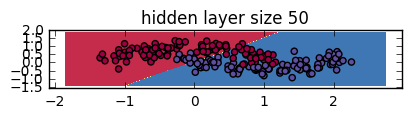

In [22]:
# Build a model with five-dimensional hidden layer           
model= build_model(5,print_loss=True)
plot_decision_boundary(lambda x:predict(model,x))
plt.title("Decision boundary layer for hidden layer size")
plt.show()
plt.show()
plt.figure(figsize=(16,32))
hidden_layer_dimensions=[1,2,3,4,5,10,20,35,50]
for i,nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(9,2,i+1)
    plt.title('hidden layer size %d'% nn_hdim)
    model=build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model,x))
    plt.show()
    
    
    

